In [4]:

!pip install textblob
!pip install better-profanity

In [5]:
# Import Basic Libraries
import re
import os
import pandas as pd
import numpy as np
from datetime import datetime

from better_profanity import profanity
from textblob import TextBlob

# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import NLP Libraries
import nltk
from nltk.corpus import stopwords

# downloading stopwords
nltk.download('stopwords')

# Remove distarcting warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#         print(os.path.join(dirname, filename))
df = pd.read_csv("sample_data/tweets.csv")
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (50001, 6)

Show Top 10 Records


,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0
5,5,2023-03-29 15:21:29+00:00,FreeMindKeenEye,@IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...,0.0,0.0
6,6,2023-03-29 15:20:41+00:00,SamsSamsson6,@darrengrimes_ Why are pakistani /indian dual ...,0.0,0.0
7,7,2023-03-29 15:20:16+00:00,SamsSamsson6,@PeterStefanovi2 Why are pakistani /indian dua...,0.0,0.0
8,8,2023-03-29 15:19:44+00:00,SamsSamsson6,Why are pakistani /indian dual nationals allow...,0.0,0.0
9,9,2023-03-29 15:19:32+00:00,ncsukumar1,@BesuraTaansane @KartiPC @PChidambaram_IN The ...,0.0,0.0


# New Section

In [7]:
#Checking Missing Values

df.isna().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64

In [8]:
#Drop NA Value
df.dropna(inplace=True)

In [9]:
#Checking Duplicates
df.duplicated().sum()

0

In [10]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [11]:
#Checking the number of unique values of each column
df.nunique()

Unnamed: 0    49999
Date          49820
User          35108
Tweet         49568
Likes           598
Retweets        312
dtype: int64

In [12]:
#Print numerical and categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))


We have 2 numerical columns(features) : ['Likes', 'Retweets']

We have 4 categorical columns(features) : ['Unnamed: 0', 'Date', 'User', 'Tweet']


In [13]:
df['Original_Tweet']=df['Tweet']
df['DateTime'] = df['Date']
df = df.drop('Date', axis=1)
df['DateTime'] = df['DateTime'].astype(str).apply(lambda x: x.split('+')[0])
# convert the 'DateTime' column to datetime format and replace invalid values with a default datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%d %H:%M:%S').fillna(pd.Timestamp('1900-01-01'))

df['date'] = df.DateTime.apply(lambda x: x.date())
df['month'] = df.DateTime.apply(lambda x: x.month)
df['year'] = df.DateTime.apply(lambda x: x.year)
df['hour'] = df.DateTime.apply(lambda x: x.hour)
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [14]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.


# define the stopwords list
stop_words = stopwords.words('english')

def clean_tweet(tweet):
    # convert to lower case
    tweet = tweet.lower()

    # remove twitter handlers
    tweet = re.sub('@[^\s]+', '', tweet)

    # remove hashtags
    tweet = re.sub(r'\B#\S+', '', tweet)

    # remove urls
    tweet = re.sub(r"http\S+", "", tweet)

    # remove special characters and punctuations
    tweet = re.sub(r'\W', ' ', tweet)

    # remove single characters except for 'a' and 'i'
    tweet = re.sub(r'\s+[a-hj-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+i\s+', ' I ', tweet)
    tweet = re.sub(r'\s+a\s+', ' a ', tweet)

    # substitute multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

    # remove stop words
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

In [15]:
df['Tweet'] = df['Tweet'].apply(clean_tweet)

In [16]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,respected indian citizens namaskaar I original...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,respected indian citizens namaskaar I original...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talkin...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,would politicians stop using religion politics...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,state level president knows policy pm union mi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [17]:
import nltk
#nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [19]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [20]:
def preprocess(corpus, keep_list=[], stemming = False, stem_type = None, lemmatization = False):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)

    Input :
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'stemming', 'lemmatization' - Boolean variables indicating whether a particular task should
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer

    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together

    Output : Returns the processed text corpus

    '''

    if lemmatization == True:
        corpus = lemmatize(corpus)


    if stemming == True:
        corpus = stem(corpus, stem_type)

    corpus = [' '.join(tweet) for tweet in corpus]

    return corpus

In [21]:
corpus = df['Tweet'].str.split().tolist()

In [22]:
type(corpus)

list

In [23]:
# Preprocessing with Lemmatization here
preprocessed_corpus = preprocess(corpus, keep_list = [], stemming = False, stem_type = None,
                                lemmatization = True)


In [24]:
df['Tweet']=preprocessed_corpus

In [25]:
df

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,state level president know policy pm union min...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15
...,...,...,...,...,...,...,...,...,...,...,...
49996,49995,vinoims,cong rule 60 yrs center amp state level indian...,0.0,0.0,@kaushikcbasu Cong ruled for 60 +yrs at center...,2022-10-15 11:00:52,2022-10-15,10,2022,11
49997,49996,Dan_T129,indian lobbyists win pakistani busy fight war ...,0.0,0.0,@ARYSabirShakir @OfficialDGISPR It's indian lo...,2022-10-15 10:56:51,2022-10-15,10,2022,10
49998,49997,shivashan_,true leader put team front success failure acc...,4.0,1.0,@Schandillia A true leader puts the team in fr...,2022-10-15 10:50:52,2022-10-15,10,2022,10
49999,49998,SUNILKU74204938,rahul gandhi mahanayak india regard bharat jod...,0.0,0.0,Now' Rahul Gandhi is Mahanayak of\nINDIA. Rega...,2022-10-15 10:41:17,2022-10-15,10,2022,10


In [26]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]


# Create a dataframe of each tweet against its polarity
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

df['Polarity']=sentiment_df['polarity']

In [27]:
# Create the new column using a lambda function and apply() to classify the tweets as Positive, Negative, or Neutral.
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [28]:
subset_df = df[['User', 'Tweet', 'Likes', 'Retweets', 'Polarity', 'Sentiment']]
subset_df.head()



,User,Tweet,Likes,Retweets,Polarity,Sentiment
0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,-0.062500,Negative
1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,-0.062500,Negative
2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,0.173232,Positive
3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,0.000000,Neutral
4,itweetsensee,state level president know policy pm union min...,0.0,0.0,0.214286,Positive


In [29]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour,Polarity,Sentiment
0,0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15,-0.062500,Negative
1,1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15,-0.062500,Negative
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15,0.173232,Positive
3,3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15,0.000000,Neutral
4,4,itweetsensee,state level president know policy pm union min...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15,0.214286,Positive


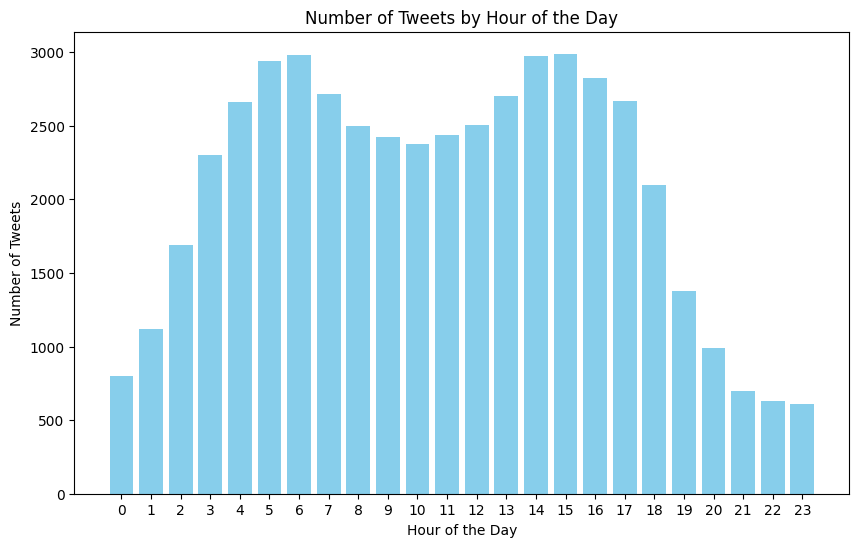

In [30]:
import matplotlib.pyplot as plt

# Grouping the data by hour and counting the number of tweets
tweet_counts_by_hour = df.groupby('hour').size()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(tweet_counts_by_hour.index, tweet_counts_by_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of the Day')
plt.xticks(range(24))  # Set the x-axis ticks to be the hours of the day (0 to 23)
plt.show()



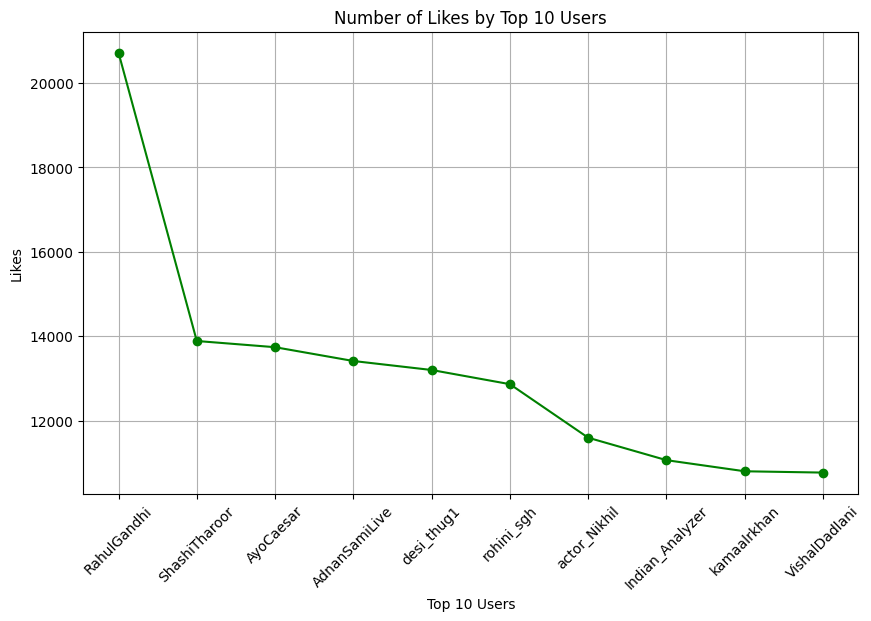

In [31]:

# Assuming df contains a column 'User' for usernames and 'Likes' for number of likes
top_10_users = df.groupby('User')['Likes'].sum().nlargest(10)

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_users.index, top_10_users.values, marker='o', color='green', linestyle='-')
plt.xlabel('Top 10 Users')
plt.ylabel('Likes')
plt.title('Number of Likes by Top 10 Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


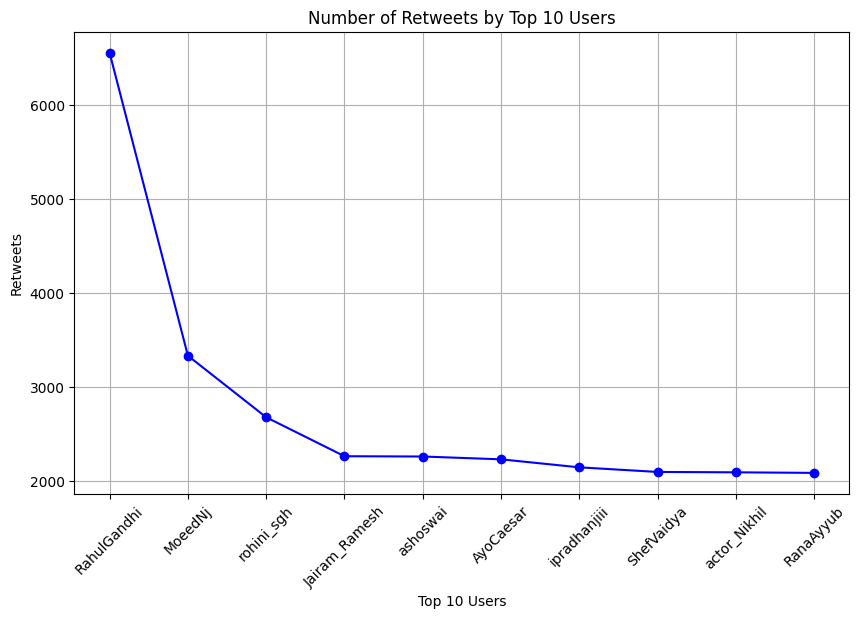

In [32]:


# Assuming df contains a column 'User' for usernames and 'Retweets' for number of retweets
top_10_users_retweets = df.groupby('User')['Retweets'].sum().nlargest(10)

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_users_retweets.index, top_10_users_retweets.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Top 10 Users')
plt.ylabel('Retweets')
plt.title('Number of Retweets by Top 10 Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


In [33]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate the percentage for each sentiment
positive_percent = sentiment_counts['Positive'] / len(df) * 100
negative_percent = sentiment_counts['Negative'] / len(df) * 100
neutral_percent = sentiment_counts['Neutral'] / len(df) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_percent, negative_percent, neutral_percent]
colors = ['mediumseagreen', 'crimson', 'royalblue']
fig = px.pie(values=values, names=labels, color_discrete_sequence=colors)
fig.update_traces(textinfo='percent+label')

# Set the chart title and font size
fig.update_layout(title_text='Sentiment Distribution', title_font_size=24)

# Display the chart
fig.show()

In [34]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0'+h
    h = h+ ":00"
    return h

sentiment_hourly = df.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=sentiment_hourly,
    r=sentiment_hourly['Number of Tweets'],
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)
fig.update_layout(
    title="Time of Day no. of positive tweet, no. of negative tweet, no. of neutral tweet",
    title_x=0.5,
    template="ggplot2"
)
fig.show()

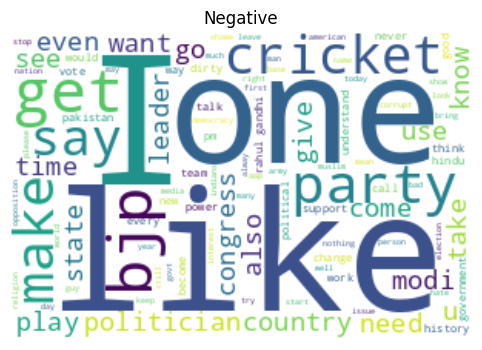

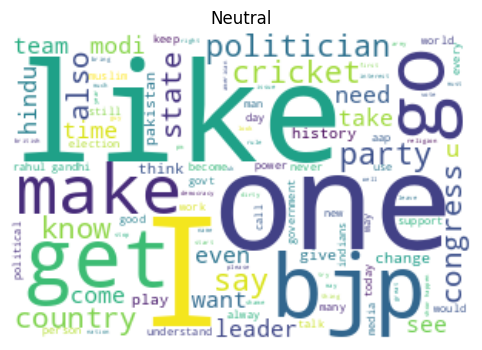

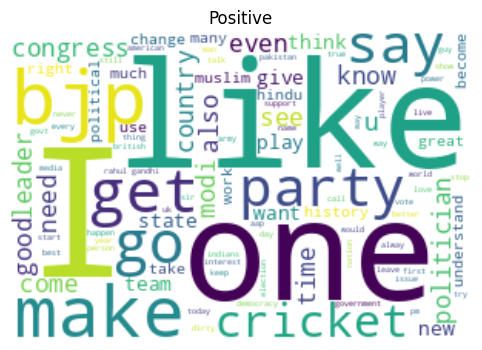

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a set of words to exclude from the word cloud
exclude_words = ['indian', 'politic', 'politics','amp','people','india']  # Add the words you want to exclude

# Group the tweets by sentiment and concatenate them into a single string
sentiment_groups = df.groupby('Sentiment')
text_by_sentiment = {}

for sentiment, group in sentiment_groups:
    text_by_sentiment[sentiment] = ' '.join(group['Tweet'].tolist())

# Generate a wordcloud for each sentiment with a maximum number of words and excluding specified words
max_words = 100  # Adjust this number as per your preference

for sentiment, text in text_by_sentiment.items():
    wordcloud = WordCloud(
        background_color='white',
        width=300,
        height=200,
        max_words=max_words,
        stopwords=exclude_words  # Exclude specified words from the word cloud
    ).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()


In [36]:
df.columns

Index(['Unnamed: 0', 'User', 'Tweet', 'Likes', 'Retweets', 'Original_Tweet',
       'DateTime', 'date', 'month', 'year', 'hour', 'Polarity', 'Sentiment'],
      dtype='object')

In [37]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [38]:
print(vectorizer.get_feature_names_out())
print(tf_idf_matrix.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)

['00' '000' '0001' ... '𝗣𝗶𝗹𝗹𝗮𝘆' '𝗥𝗲𝗽𝗿𝗲𝘀𝗲𝗻𝘁𝗮𝘁𝗶𝗼𝗻' '𝙙𝙤𝙜𝙨']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of the TF-IDF matrix is:  (49999, 38566)


In [39]:
f_tweets = df['Tweet'].tolist()


In [40]:
import gensim
from gensim.utils import simple_preprocess

def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = df.Tweet.values.tolist()
text_words = text_to_words(text)
print(text_words[0])

['respect', 'indian', 'citizens', 'namaskaar', 'original', 'gandhi', 'branch', 'franchise', 'none', 'relatives', 'politics', 'beware', 'fake', 'gandhi', 'take', 'care', 'mohandas', 'karamchand', 'gandhi']


In [41]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# View
print(corpus_vec[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1)]


In [42]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(9,
  '0.099*"minister" + 0.080*"pm" + 0.057*"prime" + 0.040*"president" + '
  '0.040*"modi" + 0.033*"home" + 0.030*"chanakya" + 0.027*"delhi" + 0.026*"ji" '
  '+ 0.025*"request" + 0.020*"become" + 0.019*"cm" + 0.014*"visit" + '
  '0.013*"former" + 0.013*"age" + 0.012*"uk" + 0.012*"secular" + 0.012*"ask" + '
  '0.012*"liar" + 0.011*"decision"'),
 (13,
  '0.061*"political" + 0.053*"new" + 0.040*"see" + 0.028*"long" + '
  '0.028*"matter" + 0.027*"bad" + 0.023*"low" + 0.023*"congratulations" + '
  '0.023*"common" + 0.021*"ur" + 0.018*"development" + 0.016*"someone" + '
  '0.015*"join" + 0.013*"line" + 0.013*"minorities" + 0.013*"open" + '
  '0.013*"journalism" + 0.012*"present" + 0.011*"politicians" + '
  '0.010*"market"'),
 (15,
  '0.096*"hindu" + 0.049*"muslim" + 0.046*"muslims" + 0.037*"hindus" + '
  '0.029*"job" + 0.025*"hindutva" + 0.024*"around" + 0.021*"forget" + '
  '0.019*"whole" + 0.018*"world" + 0.014*"religion" + 0.013*"racist" + '
  '0.013*"people" + 0.012*"maybe" + 0.012*"p

In [43]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
dict_word = corpora.Dictionary(text_words)
dict_word.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [dict_word.doc2bow(text) for text in texts]

model = TfidfModel(corpus=corpus_vec, id2word=dict_word)  # fit model
corpus_tfidf = [model[c] for c in corpus_vec]  # apply model to corpus document

# View
print(corpus_tfidf[0])

[(0, 0.39072112867061215), (1, 0.26859568897475666), (2, 0.276398995812088), (3, 0.2708278317925911), (4, 0.5455465314190142), (5, 0.31892636063247815), (6, 0.3650302564650514), (7, 0.24554327901549958), (8, 0.18048713156597188)]


In [44]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dict_word, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(6,
  '0.021*"future" + 0.017*"love" + 0.017*"pak" + 0.017*"pakistan" + 0.016*"tv" '
  '+ 0.014*"mix" + 0.013*"relevant" + 0.013*"present" + 0.013*"cricketers" + '
  '0.011*"especially" + 0.011*"unfortunately" + 0.011*"pakistani" + '
  '0.011*"etc" + 0.010*"picture" + 0.010*"absolutely" + 0.010*"cheap" + '
  '0.010*"debate" + 0.010*"religion" + 0.010*"person" + 0.009*"follow"'),
 (4,
  '0.023*"least" + 0.023*"china" + 0.022*"youth" + 0.020*"face" + '
  '0.020*"decades" + 0.020*"candidate" + 0.019*"represent" + 0.019*"statement" '
  '+ 0.017*"two" + 0.015*"th" + 0.014*"probably" + 0.014*"usa" + 0.014*"three" '
  '+ 0.014*"limit" + 0.013*"gt" + 0.013*"style" + 0.013*"hell" + 0.013*"trade" '
  '+ 0.013*"amaze" + 0.012*"die"'),
 (20,
  '0.016*"away" + 0.016*"twitter" + 0.014*"note" + 0.014*"enjoy" + '
  '0.013*"hope" + 0.013*"money" + 0.012*"loose" + 0.012*"fund" + '
  '0.012*"expose" + 0.011*"keep" + 0.011*"pray" + 0.011*"atleast" + '
  '0.011*"sell" + 0.011*"representation" + 0.010*"sig

In [45]:
!pip install pyLDAvis

In [46]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dict_word)
pyLDAvis.display(LDAvis_prepared)

In [47]:
lda_model.show_topic(0, topn=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('congratulations', 0.031860154),
 ('science', 0.029083794),
 ('act', 0.022527758),
 ('sanju', 0.021413649),
 ('role', 0.019324543),
 ('experience', 0.018121632),
 ('star', 0.016852427),
 ('rare', 0.014674821),
 ('father', 0.014392933),
 ('miss', 0.013462179),
 ('main', 0.012721134),
 ('curse', 0.011968819),
 ('difference', 0.011472246),
 ('bigger', 0.011388974),
 ('territory', 0.011349302),
 ('appreciate', 0.010970761),
 ('honest', 0.010846589),
 ('drag', 0.0104604885),
 ('practice', 0.010419931),
 ('appoint', 0.009408123),
 ('kumar', 0.008865256),
 ('strengthen', 0.008859789),
 ('body', 0.008748238),
 ('fellow', 0.008650877),
 ('simple', 0.008631474),
 ('defence', 0.008487793),
 ('fast', 0.008425134),
 ('good', 0.008243636),
 ('sir', 0.00819276),
 ('art', 0.008157388)]

In [48]:
subset_df = df[[ 'Tweet', 'Likes', 'Retweets',  'Sentiment']]
subset_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Tweet,Likes,Retweets,Sentiment
0,respect indian citizens namaskaar I original g...,0.0,0.0,Negative
1,respect indian citizens namaskaar I original g...,0.0,0.0,Negative
2,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,Positive
3,would politicians stop use religion politics i...,0.0,0.0,Neutral
4,state level president know policy pm union min...,0.0,0.0,Positive


In [49]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
subset_df.iloc[:,[3]] = subset_df.iloc[:,[3]].apply(label_encoding.fit_transform)
subset_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Tweet,Likes,Retweets,Sentiment
0,respect indian citizens namaskaar I original g...,0.0,0.0,0
1,respect indian citizens namaskaar I original g...,0.0,0.0,0
2,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,2
3,would politicians stop use religion politics i...,0.0,0.0,1
4,state level president know policy pm union min...,0.0,0.0,2


In [50]:
X = subset_df.iloc[:,0]
y = subset_df.iloc[:,-1] # extract column with sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
import numpy as np
# tokenize the news text and convert data in matrix format
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)
X_vec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<49999x38375 sparse matrix of type '<class 'numpy.int64'>'
	with 717501 stored elements in Compressed Sparse Row format>

In [52]:
# Transform data by applying term frequency inverse document frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf = np.asarray(X_tfidf)
X_tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])